In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("//kaggle/input/fantasy-football-data-2017-2023/fantasy_merged_7_17.csv")

In [3]:
df.shape

(3388, 27)

In [4]:
df.head(5)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,NaN,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [5]:
df.columns

Index(['Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Yds',
       'TD', 'Int', 'RushAtt', 'RushYds', 'YA', 'RushTD', 'Tgt', 'Rec',
       'RecYds', 'YR', 'RecTD', 'Fmb', 'FL', 'PPR', 'PlayerID', 'PosRk',
       'Year'],
      dtype='object')

In [6]:
df.dtypes

Rk            int64
Player       object
Tm           object
FantPos      object
Age           int64
G             int64
GS            int64
Cmp           int64
Att           int64
Yds           int64
TD            int64
Int           int64
RushAtt       int64
RushYds       int64
YA          float64
RushTD        int64
Tgt           int64
Rec           int64
RecYds        int64
YR          float64
RecTD         int64
Fmb           int64
FL            int64
PPR         float64
PlayerID     object
PosRk       float64
Year          int64
dtype: object

In [7]:
df.describe()

,Rk,Age,G,GS,Cmp,Att,Yds,TD,Int,RushAtt,...,Tgt,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PosRk,Year
count,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,...,3388.000000,3388.000000,3388.000000,2879.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000
mean,283.176505,26.151712,11.424439,5.482881,20.385183,31.788666,227.657025,1.428276,0.739965,24.601535,...,30.624557,20.355077,227.417355,10.402122,1.419421,1.028926,0.474911,80.105549,80.824085,2019.553719
std,163.621520,3.376835,4.915755,5.552923,74.131070,114.051846,833.777058,5.593492,2.635180,53.965029,...,36.598212,24.535182,303.062212,4.880031,2.258272,2.035061,0.996431,85.954992,55.025665,1.700590
min,1.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-11.000000,-11.000000,0.000000,0.000000,0.000000,-3.300000,1.000000,2017.000000
25%,142.000000,24.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,15.000000,7.430000,0.000000,0.000000,0.000000,12.200000,36.000000,2018.000000
50%,283.000000,25.000000,13.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,16.000000,10.000000,99.000000,10.000000,0.000000,0.000000,0.000000,47.550000,71.000000,2020.000000
75%,424.000000,28.000000,16.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,...,47.000000,31.000000,317.250000,12.820000,2.000000,1.000000,1.000000,125.900000,117.250000,2021.000000
max,594.000000,45.000000,17.000000,17.000000,490.000000,733.000000,5316.000000,50.000000,30.000000,378.000000,...,191.000000,149.000000,1947.000000,48.000000,18.000000,19.000000,11.000000,471.200000,227.000000,2022.000000


In [8]:
#filter data to important metrics
df = df[['Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', #'Cmp', 'Att', 
         'Yds',
       'TD', 'Int', #'RushAtt', 
         'RushYds', #'YA', 
         'RushTD', #'Tgt', 
         'Rec',
       'RecYds', #'YR', 
         'RecTD', 'Fmb', #'FL', 
         'PPR', 
         #'PlayerID', 
         'PosRk',
       'Year']].copy()

In [9]:
df.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Yds,TD,Int,RushYds,RushTD,Rec,RecYds,RecTD,Fmb,PPR,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,1305,13,64,788,6,5,383.3,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,3983,34,11,586,3,0,0,0,14,347.9,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,1291,9,85,655,2,3,341.6,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,728,8,81,826,5,1,320.4,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,0,0,101,1533,9,4,310.3,1.0,2017


In [10]:
df.shape

(3388, 19)

In [11]:
df.isna().sum()

Rk         0
Player     0
Tm         0
FantPos    0
Age        0
G          0
GS         0
Yds        0
TD         0
Int        0
RushYds    0
RushTD     0
Rec        0
RecYds     0
RecTD      0
Fmb        0
PPR        0
PosRk      0
Year       0
dtype: int64

In [12]:
df.loc[df.duplicated(subset=['Player'])]

,Rk,Player,Tm,FantPos,Age,G,GS,Yds,TD,Int,RushYds,RushTD,Rec,RecYds,RecTD,Fmb,PPR,PosRk,Year
404,405,Chris Thompson,HOU,WR,23,13,0,0,0,0,0,0,5,84,0,3,13.4,162.0,2017
535,1,Patrick Mahomes,KAN,QB,23,16,16,5097,50,12,272,2,0,0,0,9,417.1,1.0,2018
537,3,Christian McCaffrey,CAR,RB,22,16,16,50,1,0,1098,7,107,867,6,4,385.5,2.0,2018
538,4,Todd Gurley,LAR,RB,24,14,14,0,0,0,1251,17,59,580,4,1,372.1,3.0,2018
539,5,Matt Ryan,ATL,QB,33,16,16,4924,35,7,125,3,1,5,1,10,355.0,2.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,572,Jordan Howard,NOR,RB,28,2,0,0,0,0,1,0,0,0,0,0,0.1,162.0,2022
3383,573,Nate Sudfeld,DET,QB,29,2,0,0,0,0,-4,0,0,0,0,0,-0.4,80.0,2022
3385,575,Chad Henne,KAN,QB,37,3,0,0,0,0,-5,0,0,0,0,1,-0.5,81.0,2022
3386,576,C.J. Beathard,JAX,QB,29,4,0,35,0,1,-4,0,0,0,0,0,-1.0,82.0,2022


In [13]:
#group by year so we can look at duplicate players by year
df['Player'].groupby(df['Year'])

In [14]:
df.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Yds,TD,Int,RushYds,RushTD,Rec,RecYds,RecTD,Fmb,PPR,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,1305,13,64,788,6,5,383.3,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,3983,34,11,586,3,0,0,0,14,347.9,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,1291,9,85,655,2,3,341.6,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,728,8,81,826,5,1,320.4,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,0,0,101,1533,9,4,310.3,1.0,2017


In [15]:
#want to see different data based off of position
rb = df[df['FantPos']=='RB']
qb = df[df['FantPos']=='QB']
wr = df[df['FantPos']=='WR']
te = df[df['FantPos']=='TE']

In [16]:
rb.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Yds,TD,Int,RushYds,RushTD,Rec,RecYds,RecTD,Fmb,PPR,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,1305,13,64,788,6,5,383.3,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,1291,9,85,655,2,3,341.6,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,728,8,81,826,5,1,320.4,3.0,2017
8,9,Kareem Hunt,KAN,RB,22,16,16,0,0,0,1327,8,53,455,3,1,295.2,4.0,2017
10,11,Melvin Gordon,LAC,RB,24,16,16,0,0,0,1105,8,58,476,4,1,288.1,5.0,2017


Text(0.5, 0, 'PPR per End of Year')

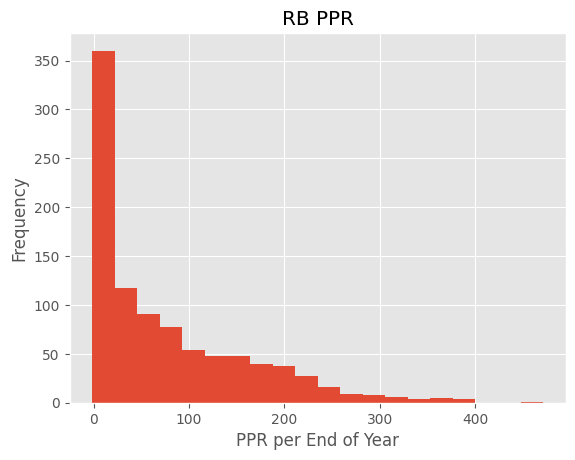

In [17]:
ax = rb['PPR'].plot(kind='hist',bins=20, title = "RB PPR")
ax.set_xlabel('PPR per End of Year')

Text(0.5, 0, 'PPR per End of Year')

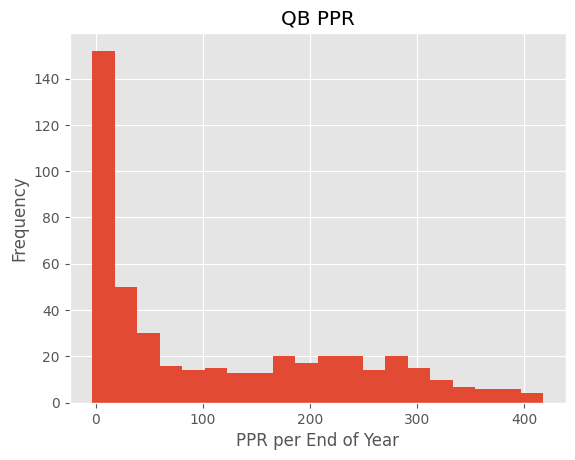

In [18]:
ax = qb['PPR'].plot(kind='hist',bins=20, title = "QB PPR")
ax.set_xlabel('PPR per End of Year')

Text(0.5, 0, 'PPR per End of Year')

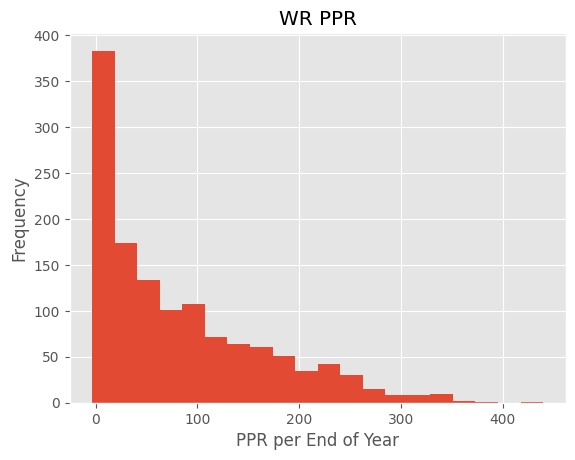

In [19]:
ax = wr['PPR'].plot(kind='hist',bins=20, title = "WR PPR")
ax.set_xlabel('PPR per End of Year')

Text(0.5, 0, 'PPR per End of Year')

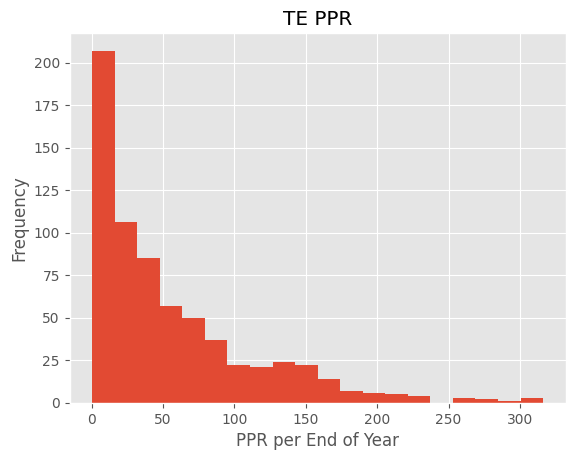

In [20]:
ax = te['PPR'].plot(kind='hist',bins=20, title = "TE PPR")
ax.set_xlabel('PPR per End of Year')

In [21]:
rb['PPR'].describe()

count    953.000000
mean      77.456243
std       83.729659
min       -1.600000
25%       10.900000
50%       45.400000
75%      123.400000
max      471.200000
Name: PPR, dtype: float64

In [22]:
filtered_rb = rb[rb['PPR'] > 123]

# Count how many times each player appears on the list
player_counts = filtered_rb['Player'].value_counts()

# Print the player names, their counts, and the years they appear
for player in player_counts.index:
    count = player_counts[player]
    years = filtered_rb[filtered_rb['Player'] == player]['Year'].tolist()
    print(f"{player} {years}")


Alvin Kamara [2017, 2018, 2019, 2020, 2021, 2022]
Derrick Henry [2017, 2018, 2019, 2020, 2021, 2022]
Ezekiel Elliott [2017, 2018, 2019, 2020, 2021, 2022]
Austin Ekeler [2018, 2019, 2020, 2021, 2022]
Leonard Fournette [2017, 2019, 2020, 2021, 2022]
Joe Mixon [2017, 2018, 2019, 2021, 2022]
Latavius Murray [2017, 2018, 2019, 2020, 2022]
Christian McCaffrey [2017, 2018, 2019, 2021, 2022]
James Conner [2018, 2019, 2020, 2021, 2022]
Nick Chubb [2018, 2019, 2020, 2021, 2022]
Dalvin Cook [2018, 2019, 2020, 2021, 2022]
Melvin Gordon [2017, 2018, 2019, 2020, 2021]
Aaron Jones [2018, 2019, 2020, 2021, 2022]
Saquon Barkley [2018, 2019, 2021, 2022]
Josh Jacobs [2019, 2020, 2021, 2022]
David Montgomery [2019, 2020, 2021, 2022]
Kenyan Drake [2017, 2018, 2019, 2020]
Jamaal Williams [2017, 2019, 2020, 2022]
Devin Singletary [2019, 2020, 2021, 2022]
Todd Gurley [2017, 2018, 2019, 2020]
Kareem Hunt [2017, 2018, 2020, 2022]
Antonio Gibson [2020, 2021, 2022]
Chris Carson [2018, 2019, 2020]
James White [201

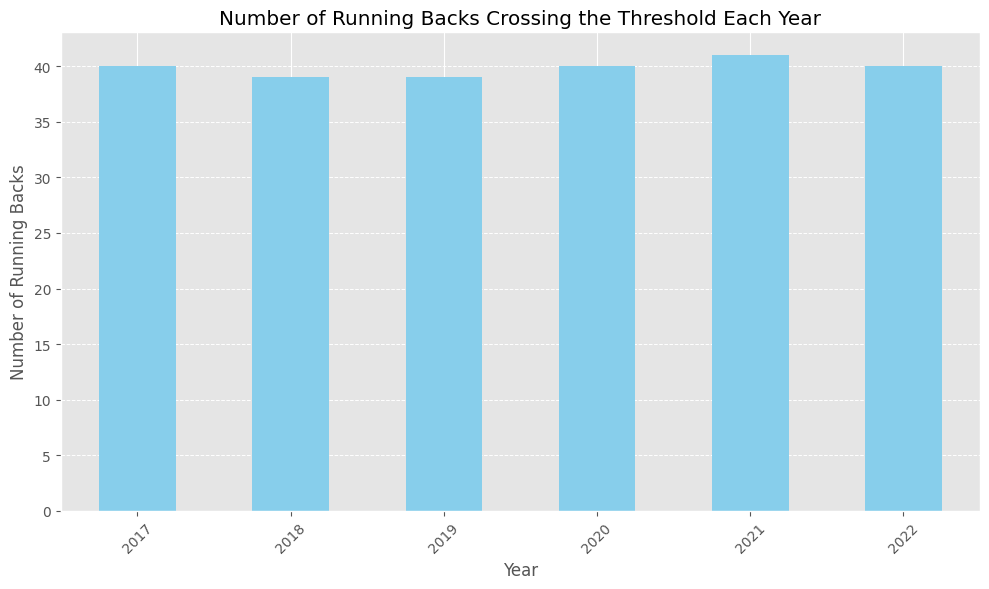

In [23]:
# Group by year and count unique players who crossed the threshold
yearly_counts = filtered_rb.groupby('Year')['Player'].nunique()

# Plot the data
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Running Backs Crossing the Threshold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Running Backs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [24]:
filtered_rb = rb[rb['PPR'] > 123]

# Count how many times each player appears on the list
player_counts = filtered_rb['Player'].value_counts()

# Print the player names, their counts, and the years they appear
for player in player_counts.index:
    count = player_counts[player]
    years = filtered_rb[filtered_rb['Player'] == player]['Year'].tolist()
    print(f"{player} {years}")


Alvin Kamara [2017, 2018, 2019, 2020, 2021, 2022]
Derrick Henry [2017, 2018, 2019, 2020, 2021, 2022]
Ezekiel Elliott [2017, 2018, 2019, 2020, 2021, 2022]
Austin Ekeler [2018, 2019, 2020, 2021, 2022]
Leonard Fournette [2017, 2019, 2020, 2021, 2022]
Joe Mixon [2017, 2018, 2019, 2021, 2022]
Latavius Murray [2017, 2018, 2019, 2020, 2022]
Christian McCaffrey [2017, 2018, 2019, 2021, 2022]
James Conner [2018, 2019, 2020, 2021, 2022]
Nick Chubb [2018, 2019, 2020, 2021, 2022]
Dalvin Cook [2018, 2019, 2020, 2021, 2022]
Melvin Gordon [2017, 2018, 2019, 2020, 2021]
Aaron Jones [2018, 2019, 2020, 2021, 2022]
Saquon Barkley [2018, 2019, 2021, 2022]
Josh Jacobs [2019, 2020, 2021, 2022]
David Montgomery [2019, 2020, 2021, 2022]
Kenyan Drake [2017, 2018, 2019, 2020]
Jamaal Williams [2017, 2019, 2020, 2022]
Devin Singletary [2019, 2020, 2021, 2022]
Todd Gurley [2017, 2018, 2019, 2020]
Kareem Hunt [2017, 2018, 2020, 2022]
Antonio Gibson [2020, 2021, 2022]
Chris Carson [2018, 2019, 2020]
James White [201

In [25]:
wr.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Yds,TD,Int,RushYds,RushTD,Rec,RecYds,RecTD,Fmb,PPR,PosRk,Year
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,0,0,101,1533,9,4,310.3,1.0,2017
5,6,DeAndre Hopkins,HOU,WR,25,15,15,0,0,0,0,0,96,1378,13,1,309.8,2.0,2017
11,12,Keenan Allen,LAC,WR,25,16,15,0,0,0,9,0,102,1393,6,1,284.2,3.0,2017
19,20,Larry Fitzgerald,ARI,WR,34,16,16,21,0,0,0,0,109,1156,6,1,261.4,4.0,2017
22,23,Jarvis Landry,MIA,WR,25,16,16,0,0,0,-7,0,112,987,9,4,260.0,5.0,2017


In [26]:
wr['PPR'].describe()

count    1297.000000
mean       82.491981
std        81.518742
min        -3.300000
25%        13.600000
50%        57.200000
75%       130.300000
max       439.500000
Name: PPR, dtype: float64

In [27]:
filtered_wr = wr[wr['PPR'] > 130.00]

# Count how many times each player appears on the list
player_counts = filtered_wr['Player'].value_counts()

# Print the player names, their counts, and the years they appear
for player in player_counts.index:
    count = player_counts[player]
    years = filtered_wr[filtered_wr['Player'] == player]['Year'].tolist()
    print(f"{player} {years}")


Amari Cooper [2017, 2018, 2019, 2020, 2021, 2022]
Davante Adams [2017, 2018, 2019, 2020, 2021, 2022]
Keenan Allen [2017, 2018, 2019, 2020, 2021, 2022]
DeAndre Hopkins [2017, 2018, 2019, 2020, 2021, 2022]
Cooper Kupp [2017, 2018, 2019, 2020, 2021, 2022]
Stefon Diggs [2017, 2018, 2019, 2020, 2021, 2022]
Tyreek Hill [2017, 2018, 2019, 2020, 2021, 2022]
Mike Evans [2017, 2018, 2019, 2020, 2021, 2022]
Tyler Lockett [2018, 2019, 2020, 2021, 2022]
Chosen Anderson [2017, 2018, 2019, 2020, 2021]
Robert Woods [2017, 2018, 2019, 2020, 2021]
Tyler Boyd [2018, 2019, 2020, 2021, 2022]
Chris Godwin [2018, 2019, 2020, 2021, 2022]
Mike Williams [2018, 2019, 2020, 2021, 2022]
Adam Thielen [2017, 2018, 2020, 2021, 2022]
D.J. Moore [2018, 2019, 2020, 2021, 2022]
Jarvis Landry [2017, 2018, 2019, 2020, 2021]
Brandin Cooks [2017, 2018, 2020, 2021, 2022]
Emmanuel Sanders [2018, 2019, 2020, 2021]
Courtland Sutton [2018, 2019, 2021, 2022]
A.J. Brown [2019, 2020, 2021, 2022]
Curtis Samuel [2018, 2019, 2020, 2022

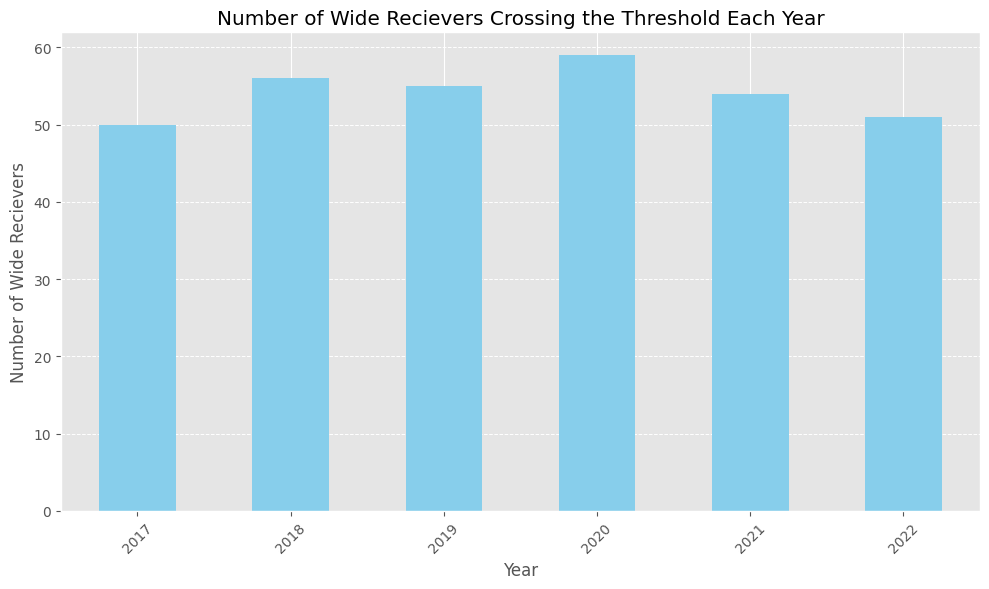

In [28]:
# Group by year and count unique players who crossed the threshold
yearly_counts = filtered_wr.groupby('Year')['Player'].nunique()

# Plot the data
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Wide Recievers Crossing the Threshold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Wide Recievers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [29]:
qb.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Yds,TD,Int,RushYds,RushTD,Rec,RecYds,RecTD,Fmb,PPR,PosRk,Year
1,2,Russell Wilson,SEA,QB,29,16,16,3983,34,11,586,3,0,0,0,14,347.9,1.0,2017
6,7,Cam Newton,CAR,QB,28,16,16,3302,22,16,754,6,0,0,0,9,299.5,2.0,2017
7,8,Tom Brady,NWE,QB,40,16,16,4577,32,8,28,0,0,0,0,7,295.9,3.0,2017
9,10,Alex Smith,KAN,QB,33,15,15,4042,26,5,355,1,0,0,0,1,295.2,4.0,2017
12,13,Carson Wentz,PHI,QB,25,13,13,3296,33,7,299,0,0,0,0,9,281.7,5.0,2017


In [30]:
filtered_qb = qb[qb['PPR'] > 214.98]

# Count how many times each player appears on the list
player_counts = filtered_qb['Player'].value_counts()

# Print the player names, their counts, and the years they appear
for player in player_counts.index:
    count = player_counts[player]
    years = filtered_qb[filtered_qb['Player'] == player]['Year'].tolist()
    print(f"{player} {years}")


Russell Wilson [2017, 2018, 2019, 2020, 2021, 2022]
Tom Brady [2017, 2018, 2019, 2020, 2021, 2022]
Kirk Cousins [2017, 2018, 2019, 2020, 2021, 2022]
Jared Goff [2017, 2018, 2019, 2020, 2022]
Derek Carr [2018, 2019, 2020, 2021, 2022]
Aaron Rodgers [2018, 2019, 2020, 2021, 2022]
Matt Ryan [2017, 2018, 2019, 2020, 2021]
Patrick Mahomes [2018, 2019, 2020, 2021, 2022]
Dak Prescott [2017, 2018, 2019, 2021]
Philip Rivers [2017, 2018, 2019, 2020]
Josh Allen [2019, 2020, 2021, 2022]
Lamar Jackson [2019, 2020, 2021, 2022]
Ben Roethlisberger [2017, 2018, 2020, 2021]
Drew Brees [2017, 2018, 2019]
Carson Wentz [2017, 2019, 2021]
Justin Herbert [2020, 2021, 2022]
Kyler Murray [2019, 2020, 2021]
Cam Newton [2017, 2018, 2020]
Baker Mayfield [2018, 2019, 2020]
Ryan Tannehill [2019, 2020, 2021]
Deshaun Watson [2018, 2019, 2020]
Matthew Stafford [2017, 2020, 2021]
Daniel Jones [2019, 2022]
Joe Burrow [2021, 2022]
Jimmy Garoppolo [2019, 2021]
Jalen Hurts [2021, 2022]
Mac Jones [2021]
Trevor Lawrence [2022

In [31]:
qb['PPR'].describe()

count    462.000000
mean     114.617100
std      118.810361
min       -3.200000
25%       10.250000
50%       57.350000
75%      214.975000
max      417.400000
Name: PPR, dtype: float64

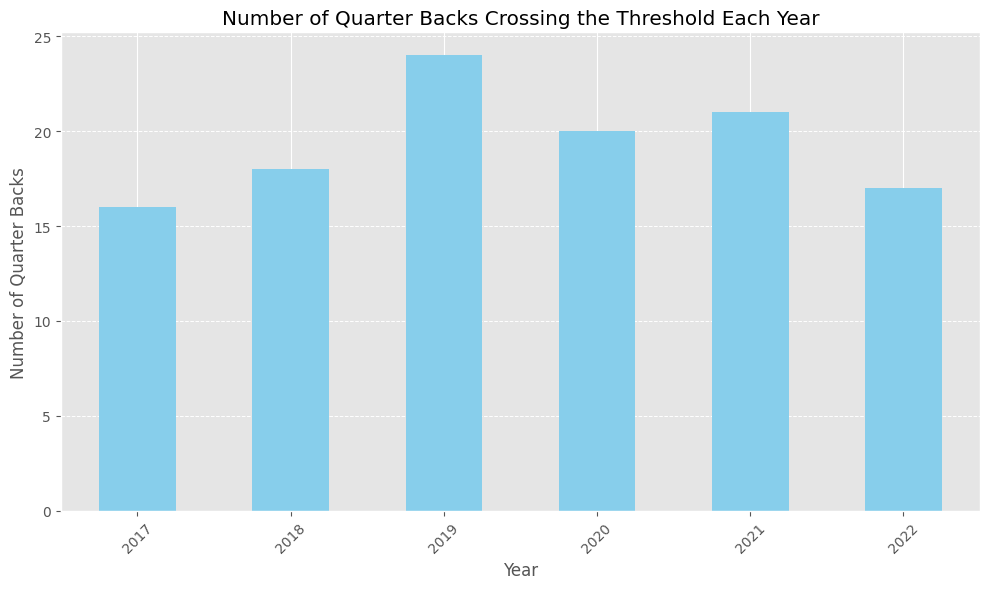

In [32]:
# Group by year and count unique players who crossed the threshold
yearly_counts = filtered_qb.groupby('Year')['Player'].nunique()

# Plot the data
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Quarter Backs Crossing the Threshold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Quarter Backs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [33]:
te['PPR'].describe()

count    676.000000
mean      55.675444
std       57.893283
min        0.300000
25%       11.500000
50%       36.150000
75%       79.625000
max      316.300000
Name: PPR, dtype: float64

In [34]:
filtered_te = te[te['PPR'] > 79.62]

# Count how many times each player appears on the list
player_counts = filtered_te['Player'].value_counts()

# Print the player names, their counts, and the years they appear
for player in player_counts.index:
    count = player_counts[player]
    years = filtered_te[filtered_te['Player'] == player]['Year'].tolist()
    print(f"{player} {years}")


Travis Kelce [2017, 2018, 2019, 2020, 2021, 2022]
Evan Engram [2017, 2018, 2019, 2020, 2021, 2022]
George Kittle [2017, 2018, 2019, 2020, 2021, 2022]
Austin Hooper [2017, 2018, 2019, 2020, 2021, 2022]
Jared Cook [2017, 2018, 2019, 2020, 2021]
Dallas Goedert [2018, 2019, 2020, 2021, 2022]
Gerald Everett [2018, 2019, 2020, 2021, 2022]
Hunter Henry [2017, 2019, 2020, 2021, 2022]
Mark Andrews [2018, 2019, 2020, 2021, 2022]
Zach Ertz [2017, 2018, 2019, 2021, 2022]
Darren Waller [2019, 2020, 2021, 2022]
T.J. Hockenson [2019, 2020, 2021, 2022]
Eric Ebron [2017, 2018, 2019, 2020]
Rob Gronkowski [2017, 2018, 2020, 2021]
Noah Fant [2019, 2020, 2021, 2022]
Jimmy Graham [2017, 2018, 2019, 2020]
Mike Gesicki [2019, 2020, 2021, 2022]
David Njoku [2017, 2018, 2021, 2022]
Tyler Higbee [2019, 2020, 2021, 2022]
Cameron Brate [2017, 2018, 2019]
Dalton Schultz [2020, 2021, 2022]
Trey Burton [2017, 2018, 2020]
O.J. Howard [2017, 2018, 2019]
Jordan Akins [2019, 2020, 2022]
Dawson Knox [2019, 2021, 2022]
Kyl

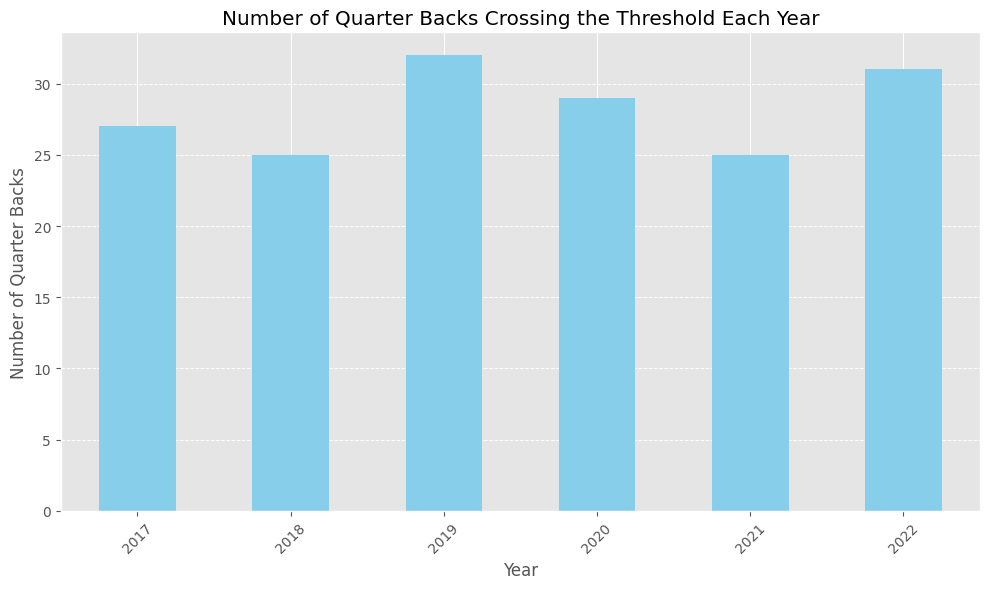

In [35]:
# Group by year and count unique players who crossed the threshold
yearly_counts = filtered_te.groupby('Year')['Player'].nunique()

# Plot the data
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Quarter Backs Crossing the Threshold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Quarter Backs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

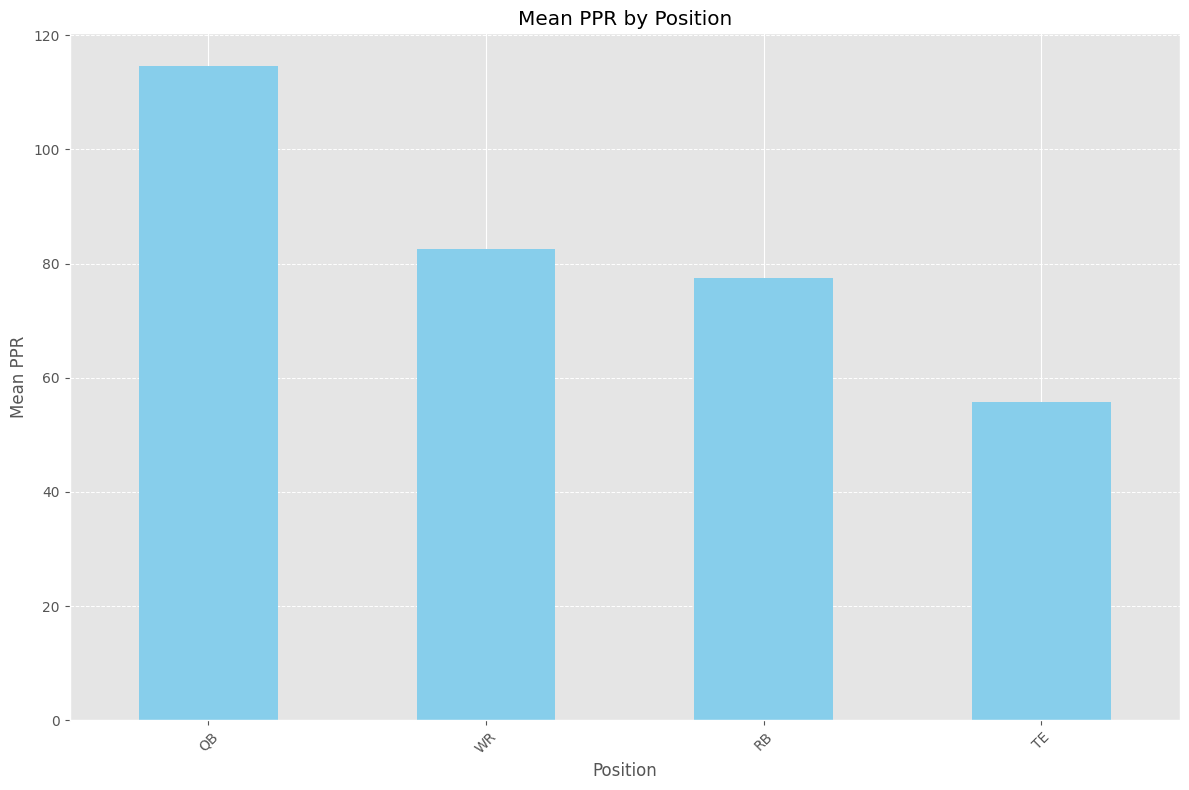

In [36]:
# Group by position and calculate the mean PPR for each position
mean_ppr_by_position = df.groupby('FantPos')['PPR'].mean()

# Sort the positions by their mean PPR in descending order
sorted_mean_ppr_by_position = mean_ppr_by_position.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
sorted_mean_ppr_by_position.plot(kind='bar', color='skyblue')
plt.title('Mean PPR by Position')
plt.xlabel('Position')
plt.ylabel('Mean PPR')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


In [37]:
df.columns

Index(['Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', 'Yds', 'TD', 'Int',
       'RushYds', 'RushTD', 'Rec', 'RecYds', 'RecTD', 'Fmb', 'PPR', 'PosRk',
       'Year'],
      dtype='object')

In [38]:
#Can we predict how many players will cross their respective 
#threshold for the next year

In [39]:
df.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Yds,TD,Int,RushYds,RushTD,Rec,RecYds,RecTD,Fmb,PPR,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,1305,13,64,788,6,5,383.3,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,3983,34,11,586,3,0,0,0,14,347.9,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,1291,9,85,655,2,3,341.6,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,728,8,81,826,5,1,320.4,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,0,0,101,1533,9,4,310.3,1.0,2017


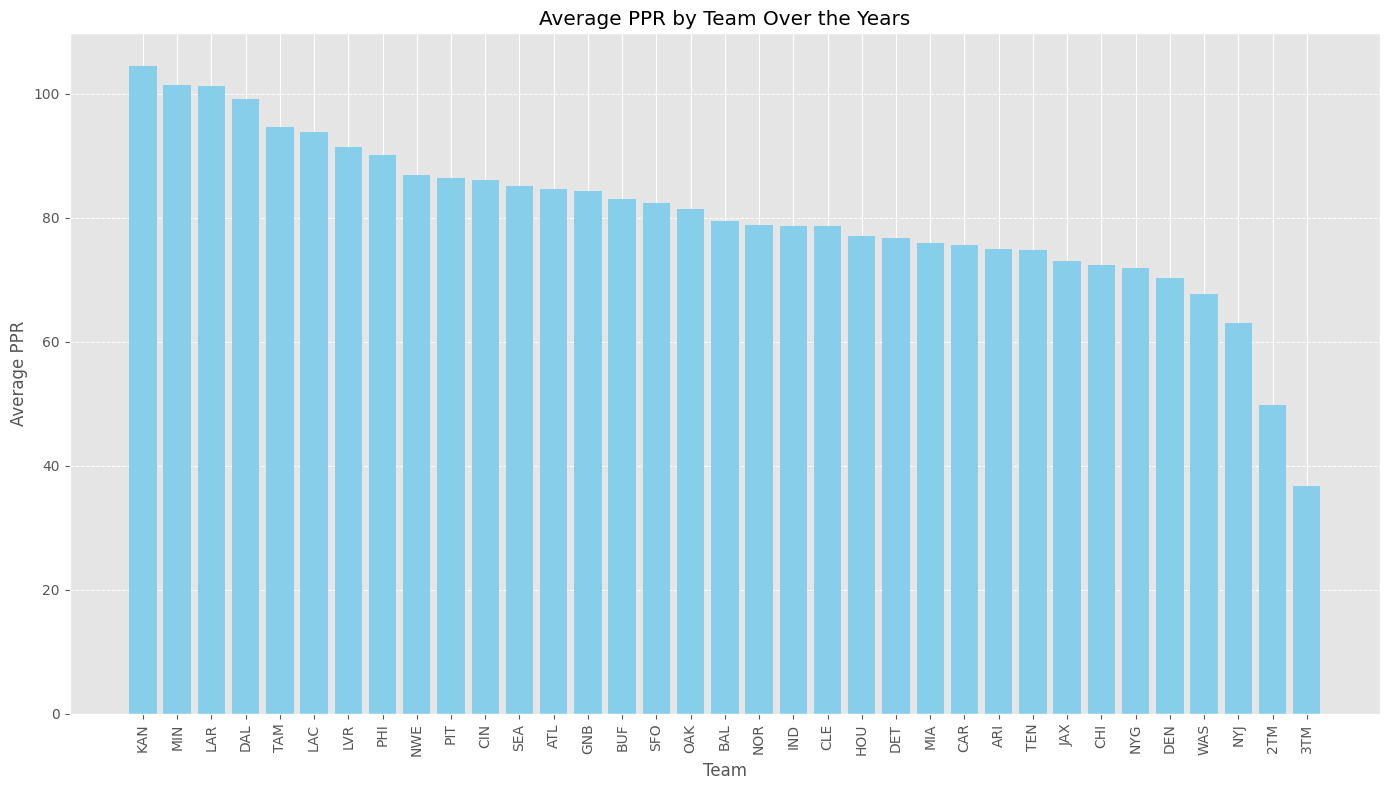

In [40]:
# Group by team and year and calculate the average PPR for each team each year
team_year_avg_ppr = df.groupby(['Tm', 'Year'])['PPR'].mean().reset_index()

# Calculate the overall average PPR for each team
overall_avg_ppr_by_team = team_year_avg_ppr.groupby('Tm')['PPR'].mean().reset_index()

# Sort the teams by their overall average PPR in descending order
sorted_avg_ppr_by_team = overall_avg_ppr_by_team.sort_values(by='PPR', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
plt.bar(sorted_avg_ppr_by_team['Tm'], sorted_avg_ppr_by_team['PPR'], color='skyblue')
plt.title('Average PPR by Team Over the Years')
plt.xlabel('Team')
plt.ylabel('Average PPR')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


In [41]:
df[df['Tm']=='SFO']

,Rk,Player,Tm,FantPos,Age,G,GS,Yds,TD,Int,RushYds,RushTD,Rec,RecYds,RecTD,Fmb,PPR,PosRk,Year
30,31,Carlos Hyde,SFO,RB,27,16,16,0,0,0,938,8,59,350,0,2,233.8,8.0,2017
84,85,Marquise Goodwin,SFO,WR,27,16,16,0,0,0,44,0,56,962,2,0,168.6,31.0,2017
157,158,George Kittle,SFO,TE,24,15,7,0,0,0,0,0,43,515,2,0,106.5,19.0,2017
160,161,Matt Breida,SFO,RB,22,16,0,0,0,0,465,2,21,180,1,1,103.5,47.0,2017
171,172,Trent Taylor,SFO,WR,23,15,1,0,0,0,0,0,43,430,2,1,96.0,69.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,422,Trey Lance,SFO,QB,22,2,2,194,0,1,67,0,0,0,0,1,12.5,62.0,2022
3261,451,Tyrion Davis-Price,SFO,RB,22,6,0,0,0,0,99,0,0,0,0,0,9.9,124.0,2022
3262,452,Tyler Kroft,SFO,TE,30,11,4,0,0,0,0,0,4,57,0,0,9.7,92.0,2022
3337,527,Danny Gray,SFO,WR,23,13,0,0,0,0,9,0,1,10,0,0,2.9,202.0,2022


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
#Feature Engineering: Create a feature for historical performance
df['Next_Year_PPR'] = df.groupby('Player')['PPR'].shift(-1)
threshold = 200  # Example threshold
df['Exceeds_Threshold'] = np.where(df['Next_Year_PPR'] > threshold, 1, 0)
df.dropna(subset=['Next_Year_PPR'], inplace=True)


In [44]:
# Prepare the feature matrix X and the target vector y
X = df[['PPR', 'FantPos']]
X = pd.get_dummies(X, columns=['FantPos'])
y = df['Exceeds_Threshold']

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict for the next fantasy year
next_year_df = df[df['Year'] == df['Year'].max()]
X_next_year = next_year_df[['PPR', 'FantPos']]
X_next_year = pd.get_dummies(X_next_year, columns=['FantPos'])
X_next_year = X_next_year.reindex(columns=X_train.columns, fill_value=0)

predictions = model.predict(X_next_year)
num_exceeding_threshold = sum(predictions)
print(f"Number of players predicted to exceed the threshold next year: {num_exceeding_threshold}")

Accuracy: 0.8669724770642202
Confusion Matrix:
[[343  18]
 [ 40  35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       361
           1       0.66      0.47      0.55        75

    accuracy                           0.87       436
   macro avg       0.78      0.71      0.73       436
weighted avg       0.86      0.87      0.86       436

Number of players predicted to exceed the threshold next year: 53


In [48]:
# Get data for the most recent fantasy year
latest_year = df['Year'].max()
next_year_df = df[df['Year'] == latest_year]

# Prepare data with basic features (PPR and position)
X_next_year = pd.get_dummies(next_year_df[['PPR', 'FantPos']], columns=['FantPos'], drop_first=True)

# Make sure columns match the training data
X_next_year = X_next_year.reindex(columns=X_train.columns, fill_value=0)

# Predict chances of crossing the threshold
next_year_df['Predicted_Prob'] = model.predict_proba(X_next_year)[:, 1]

# Filter only players likely to exceed the threshold
top_players = next_year_df[next_year_df['Predicted_Prob'] > 0.5]

# Get top 5 players per position based on probability
top_players = top_players.groupby('FantPos').apply(lambda x: x.nlargest(5, 'Predicted_Prob')).reset_index(drop=True)

# Print the results
print("Top 3 players per position predicted to exceed the threshold:")
for position in top_players['FantPos'].unique():
    pos_players = top_players[top_players['FantPos'] == position]
    for _, row in pos_players.iterrows():
        print(f"Position: {position}, Player: {row['Player']}, Predicted Probability: {row['Predicted_Prob']:.2f}")


Top 3 players per position predicted to exceed the threshold:
Position: QB, Player: Dak Prescott, Predicted Probability: 0.90
Position: QB, Player: Joe Burrow, Predicted Probability: 0.90
Position: QB, Player: Ryan Tannehill, Predicted Probability: 0.85
Position: QB, Player: Josh Allen, Predicted Probability: 0.84
Position: QB, Player: Justin Herbert, Predicted Probability: 0.84
Position: RB, Player: Joe Mixon, Predicted Probability: 0.92
Position: RB, Player: Austin Ekeler, Predicted Probability: 0.90
Position: RB, Player: Najee Harris, Predicted Probability: 0.73
Position: RB, Player: Damien Harris, Predicted Probability: 0.70
Position: RB, Player: D'Andre Swift, Predicted Probability: 0.70
Position: TE, Player: Travis Kelce, Predicted Probability: 0.86
Position: TE, Player: Mark Andrews, Predicted Probability: 0.68
Position: WR, Player: CeeDee Lamb, Predicted Probability: 0.79
Position: WR, Player: Jaylen Waddle, Predicted Probability: 0.78
Position: WR, Player: D.K. Metcalf, Predic

/tmp/ipykernel_33/1349138487.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_year_df['Predicted_Prob'] = model.predict_proba(X_next_year)[:, 1]
/tmp/ipykernel_33/1349138487.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_players = top_players.groupby('FantPos').apply(lambda x: x.nlargest(5, 'Predicted_Prob')).reset_index(drop=True)
